In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import proylib

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:153: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()
/tmp/ipykernel_10597/3575814356.py:5: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


2024-01-07 16:35:42 Configured OSMnx 1.1.2
2024-01-07 16:35:42 HTTP response caching is on


## Acceso a datos

### Hexagons

In [2]:
schema = 'hexgrid'
folder = 'hexgrid_9_city_2020'

query = f"SELECT * FROM {schema}.{folder} WHERE \"CVEGEO\" = \'14039\'"

hex_gdf = proylib.gdf_from_query(query)
print(hex_gdf.shape)
hex_gdf.head(2)

(1214, 6)


,hex_id_9,geometry,CVEGEO,NOMGEO,city,type
0,89498c96e0bffff,"POLYGON ((-103.35267 20.66765, -103.35145 20.6...",14039,Guadalajara,Guadalajara,urban
1,89498c9608bffff,"POLYGON ((-103.33820 20.62182, -103.33698 20.6...",14039,Guadalajara,Guadalajara,urban


### Censo

In [7]:
schema = 'censo'
folder = 'hex_censo_mza_2020_res9'

query = f"SELECT * FROM {schema}.{folder} WHERE  \"hex_id_9\" IN {str(tuple(list(hex_gdf.hex_id_9.unique())))}"
censo_gdf = proylib.gdf_from_query(query)

print(censo_gdf.shape)
censo_gdf.head(2)

(1127, 226)


,hex_id_9,geometry,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,dens_pob_ha,metropolis
0,89498c94cdbffff,"POLYGON ((-103.34263 20.70460, -103.34141 20.7...",1211.0,643.0,568.0,12.0,5.0,6.0,1187.0,629.0,...,359.0,290.0,196.0,73.0,0.0,0.0,33.0,0.0,97.907321,Guadalajara
1,89498c9688fffff,"POLYGON ((-103.38050 20.67510, -103.37928 20.6...",309.0,163.0,146.0,3.0,3.0,0.0,302.0,159.0,...,121.0,94.0,75.0,35.0,0.0,0.0,4.0,0.0,24.980003,Guadalajara


### Delitos

In [4]:
del_gdf = gpd.read_file('../data/processed/Delitos_GDL_170101_231031_UTM_v1.geojson')
del_gdf.head(2)

,1,delito,x,y,colonia,municipio,clave_mun,hora,bien_afectado,zo_geografica,geometry
0,42749,Lesiones dolosas,-103.292468,20.707465,SANTA CECILIA,GUADALAJARA,39,0.229166667,La vida y la integridad corporal,AMG,POINT (677825.119 2290709.688)
1,42751,Robo a vehiculos particulares,-103.319139,20.677285,SAN JUAN BOSCO,GUADALAJARA,39,0.739583333,El patrimonio,AMG,POINT (675081.595 2287339.562)


### Marginalization

In [6]:
schema = 'censo'
folder = 'nodes_marg_2020'


query = f"SELECT * FROM {schema}.{folder} WHERE \"nom_mun\" = \'Guadalajara\'"

nodes_marg = proylib.gdf_from_query(query)
print(nodes_marg.shape)
nodes_marg.head(2)

(32592, 31)


,x,y,street_count,geometry,cve_geo_ageb,cve_ent,cve_mun,cve_loc,cve_ageb,CVE_AGEB,...,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,-103.302183,20.702095,0,POINT (-103.30218 20.70210),1403900010238,14,039,0001,0238,1403900010238,...,0.000000,0.000321,0.000000,0.007274,0.013050,0.132856,0.027812,0.127293,121.006346,0.945256
1,-103.306309,20.711533,0,POINT (-103.30631 20.71153),1403900013088,14,039,0001,3088,1403900013088,...,0.000224,0.000561,0.000337,0.006733,0.012793,0.174864,0.041975,0.135449,122.378334,0.955974


In [8]:
nodes_marg.columns

Index(['x', 'y', 'street_count', 'geometry', 'cve_geo_ageb', 'cve_ent',
       'cve_mun', 'cve_loc', 'cve_ageb', 'CVE_AGEB', 'entidad', 'nom_ent',
       'mun', 'nom_mun', 'loc', 'nom_loc', 'ageb', 'pobtot', 'p6a14nae',
       'sbasc', 'psdss', 'ovsde', 'ovsee', 'ovsae', 'ovpt', 'ovsref', 'ovsint',
       'ovscel', 'ovhac', 'im_2020', 'imn_2020'],
      dtype='object')

## Spatial analysis

### Marginalization

In [12]:
nodes_hex = nodes_marg.overlay(hex_gdf, how='intersection')

nodes_pop = nodes_hex[['hex_id_9','pobtot']].groupby('hex_id_9').sum()
nodes_pop = nodes_pop.reset_index()
nodes_pop = nodes_pop.rename(columns={'pobtot':'pobtot_hex'})

nodes_hex = nodes_hex.merge(nodes_pop, on='hex_id_9')
nodes_hex['pct_pop'] = nodes_hex['pobtot'] / nodes_hex['pobtot_hex']

nodes_hex['wgt_im'] = nodes_hex['pct_pop'] * nodes_hex['im_2020']
nodes_hex['wgt_imn'] = nodes_hex['pct_pop'] * nodes_hex['imn_2020']

nodes_hex = nodes_hex[['hex_id_9','wgt_im','wgt_imn']].groupby(['hex_id_9']).sum()
nodes_hex = nodes_hex.reset_index()

print(nodes_hex.shape)
nodes_hex.head(2)

(1149, 3)


,hex_id_9,wgt_im,wgt_imn
0,89498c94003ffff,121.375759,0.948142
1,89498c94007ffff,121.059396,0.945671


In [13]:
hex_marg = hex_gdf.merge(nodes_hex, on='hex_id_9', how='left')
hex_marg = hex_marg.fillna(0)

### Crime

In [27]:
del_gdf = del_gdf.to_crs("EPSG:4326")
del_hex = del_gdf.overlay(hex_gdf, how='intersection')
del_hex = del_hex.groupby('hex_id_9').count()
del_hex = del_hex.rename(columns={'delito':'delitos_count'})

del_hex = del_hex.reset_index()
del_hex = del_hex[['hex_id_9','delitos_count']]

print(del_hex.shape)
del_hex.head(2)

(1121, 2)


,hex_id_9,delitos_count
0,89498c94003ffff,159
1,89498c94007ffff,102


In [28]:
del_hex = del_hex.merge(censo_gdf[['hex_id_9','pobtot']], on='hex_id_9', how='outer')
del_hex = del_hex.fillna(0)
del_hex.loc[del_hex.pobtot==0,'pobtot'] = 1
del_hex['del_hab'] = del_hex['delitos_count'] / del_hex['pobtot']
del_hex['del_hab_100'] = del_hex['del_hab'] * 100
hex_crime = hex_gdf.merge(del_hex, on='hex_id_9', how='left')
hex_crime = hex_crime.fillna(0)
print(hex_crime.shape)
hex_crime.head(2)

(1214, 10)


,hex_id_9,geometry,CVEGEO,NOMGEO,city,type,delitos_count,pobtot,del_hab,del_hab_100
0,89498c96e0bffff,"POLYGON ((-103.35267 20.66765, -103.35145 20.6...",14039,Guadalajara,Guadalajara,urban,245.0,877.0,0.279361,27.936146
1,89498c9608bffff,"POLYGON ((-103.33820 20.62182, -103.33698 20.6...",14039,Guadalajara,Guadalajara,urban,12.0,1.0,12.000000,1200.000000


<AxesSubplot: >

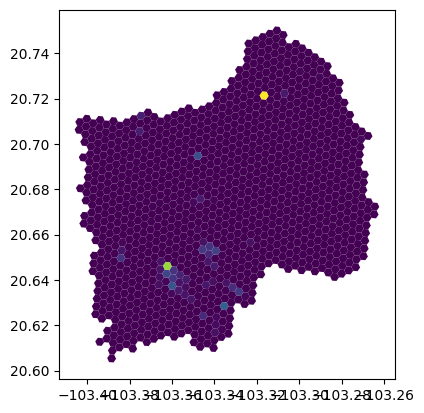

In [29]:
hex_crime.plot('del_hab_100')

### Cars per household

In [31]:
censo_gdf['auto_viv'] = censo_gdf['vph_autom'] / censo_gdf['tvivparhab']

### Socioeconomic level

In [43]:
from sklearn.preprocessing import StandardScaler

def pca(df, columns):
    """Create Principal Component Analysis from DataFrame and return Eigenvalues and Eigenvectors

    Args:
        df {pandas.DataFrame} -- DataFrame containing numeric columns for PCA
        columns {list} -- list with column names for PCA

    Returns:
        numpy.array, numpy.array -- array of Eigenvalues, array of Eigenvectors
    """

    features = np.array(df[columns]).T
    cov_matrix = np.cov(features)
    values, vectors = np.linalg.eig(cov_matrix)

    return values, vectors

def amai_nse(df):
    """Calculate Socioeconomic Levels (NSE) according to AMAI

    Args:
        df {pandas.DataFrame} -- DataFrame containing sociodemographic data for analysis at AGEB level
        df_nse {pandas.DataFrame} -- DataFrame with percentage of population by NSE and state
        state_name {string}: state name

    Returns:
        pandas.DataFrame -- DataFrame containing NSE for the specified state
    """
    #calculate indexes
    df['Idx_PC'] = df['vph_pc'].values / df[['vph_pc','vph_refri','vph_lavad','vph_tv']].max(axis=1)
    df['Idx_School'] = df['graproes'] / df['graproes'].max()
    df['Idx_PosBas'] = df['p18ym_pb'] / df['p_18ymas']

    #remove null in all columns
    idx = (df.Idx_PC.isnull())&(df.Idx_School.isnull())&(df.Idx_PosBas.isnull())
    df = df[~idx].copy()

    #fill missing data
    df['Idx_PC'].fillna((df[['Idx_PC','Idx_School','Idx_PosBas']].mean(axis=1)),inplace=True)
    df['Idx_School'].fillna((df[['Idx_PC','Idx_School','Idx_PosBas']].mean(axis=1)),inplace=True)
    df['Idx_PosBas'].fillna((df[['Idx_PC','Idx_School','Idx_PosBas']].mean(axis=1)),inplace=True)

    #pca
    values, vectors = pca(df, columns=['Idx_PC','Idx_School','Idx_PosBas'])

    #calculate nse index
    df['NSE_Idx'] = df.apply (
        lambda row: (values[0]*vectors[0,0]*row.loc['Idx_PC']+
                    values[0]*vectors[1,0]*row.loc['Idx_School']+
                    values[0]*vectors[2,0]*row.loc['Idx_PosBas']), axis=1)

    #standarize nse index values
    df['NSE_Idx'] = StandardScaler().fit_transform(np.array(df['NSE_Idx']).reshape(-1, 1))

    #sort by nse index
    df.sort_values('NSE_Idx', inplace=True)

    #calculate cumulative population and percentage
    df = df.assign(sum=df.pobtot.cumsum())
    df['pct_pob'] = df['sum'] / df['sum'].max()

    #filter DataFrame
    df = df[['hex_id_9','pobtot','Idx_PC','Idx_School',
    'Idx_PosBas','NSE_Idx']].copy()

    df.columns = df.columns.str.lower()

    # df[[c for c in df if c not in ['geometry']] + ['geometry']]

    return df

In [44]:
hex_nse = amai_nse(censo_gdf)
hex_nse = hex_gdf.merge(hex_nse, on='hex_id_9', how='left')
print(hex_nse.shape)
hex_nse.head(2)

(1214, 11)


,hex_id_9,geometry,CVEGEO,NOMGEO,city,type,pobtot,idx_pc,idx_school,idx_posbas,nse_idx
0,89498c96e0bffff,"POLYGON ((-103.35267 20.66765, -103.35145 20.6...",14039,Guadalajara,Guadalajara,urban,877.0,0.679054,0.758717,0.659693,-0.387218
1,89498c9608bffff,"POLYGON ((-103.33820 20.62182, -103.33698 20.6...",14039,Guadalajara,Guadalajara,urban,0.0,0.000000,0.000000,0.000000,3.034690


<AxesSubplot: >

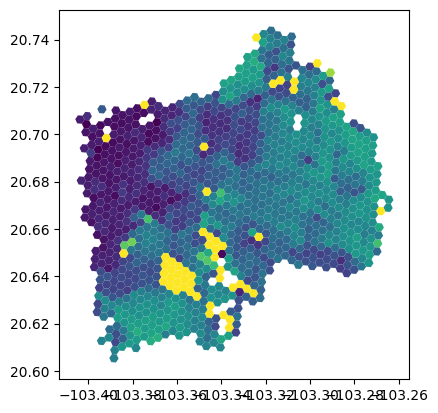

In [45]:
hex_nse.plot('nse_idx')

### Age group

In [47]:
censo_gdf.loc[censo_gdf.pobtot==0,'pobtot'] = 1
censo_gdf['pct_0_17'] = (censo_gdf['pobtot'] - censo_gdf['p_18ymas']) / censo_gdf['pobtot']
censo_gdf['pct_18_59'] = (censo_gdf['p_18ymas'] - censo_gdf['p_60ymas']) / censo_gdf['pobtot']
censo_gdf['pct_60_mas'] = censo_gdf['p_60ymas'] / censo_gdf['pobtot']

## Merge data

In [57]:
hex_socio = hex_gdf.merge(hex_nse[['hex_id_9','nse_idx']], on='hex_id_9', how='left')
hex_socio = hex_socio.merge(del_hex[['hex_id_9','delitos_count','del_hab_100']], on='hex_id_9', how='left')
hex_socio = hex_socio.merge(censo_gdf[['hex_id_9','graproes','dens_pob_ha','auto_viv',
                                      'pct_0_17','pct_18_59','pct_60_mas']], on='hex_id_9', how='left')
hex_socio = hex_socio.merge(hex_marg[['hex_id_9','wgt_imn']], on='hex_id_9', how='left')
hex_socio = hex_socio.fillna(0)
print(hex_socio.shape)
hex_socio.head(2)

(1214, 16)


,hex_id_9,geometry,CVEGEO,NOMGEO,city,type,nse_idx,delitos_count,del_hab_100,graproes,dens_pob_ha,auto_viv,pct_0_17,pct_18_59,pct_60_mas,wgt_imn
0,89498c96e0bffff,"POLYGON ((-103.35267 20.66765, -103.35145 20.6...",14039,Guadalajara,Guadalajara,urban,-0.387218,245.0,27.936146,11.904846,70.906479,0.393333,0.18244,0.645382,0.172178,0.961040
1,89498c9608bffff,"POLYGON ((-103.33820 20.62182, -103.33698 20.6...",14039,Guadalajara,Guadalajara,urban,3.034690,12.0,1200.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.965182


In [53]:
hex_socio.to_file('../data/processed/hex_sociodemographic.geojson')